In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [11]:
nflx = pd.read_csv("nflx.csv")
nflx

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [12]:
nflx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [13]:
nflx['Date'] = pd.to_datetime(nflx['Date'])

In [15]:
nflx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [16]:
nflx.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

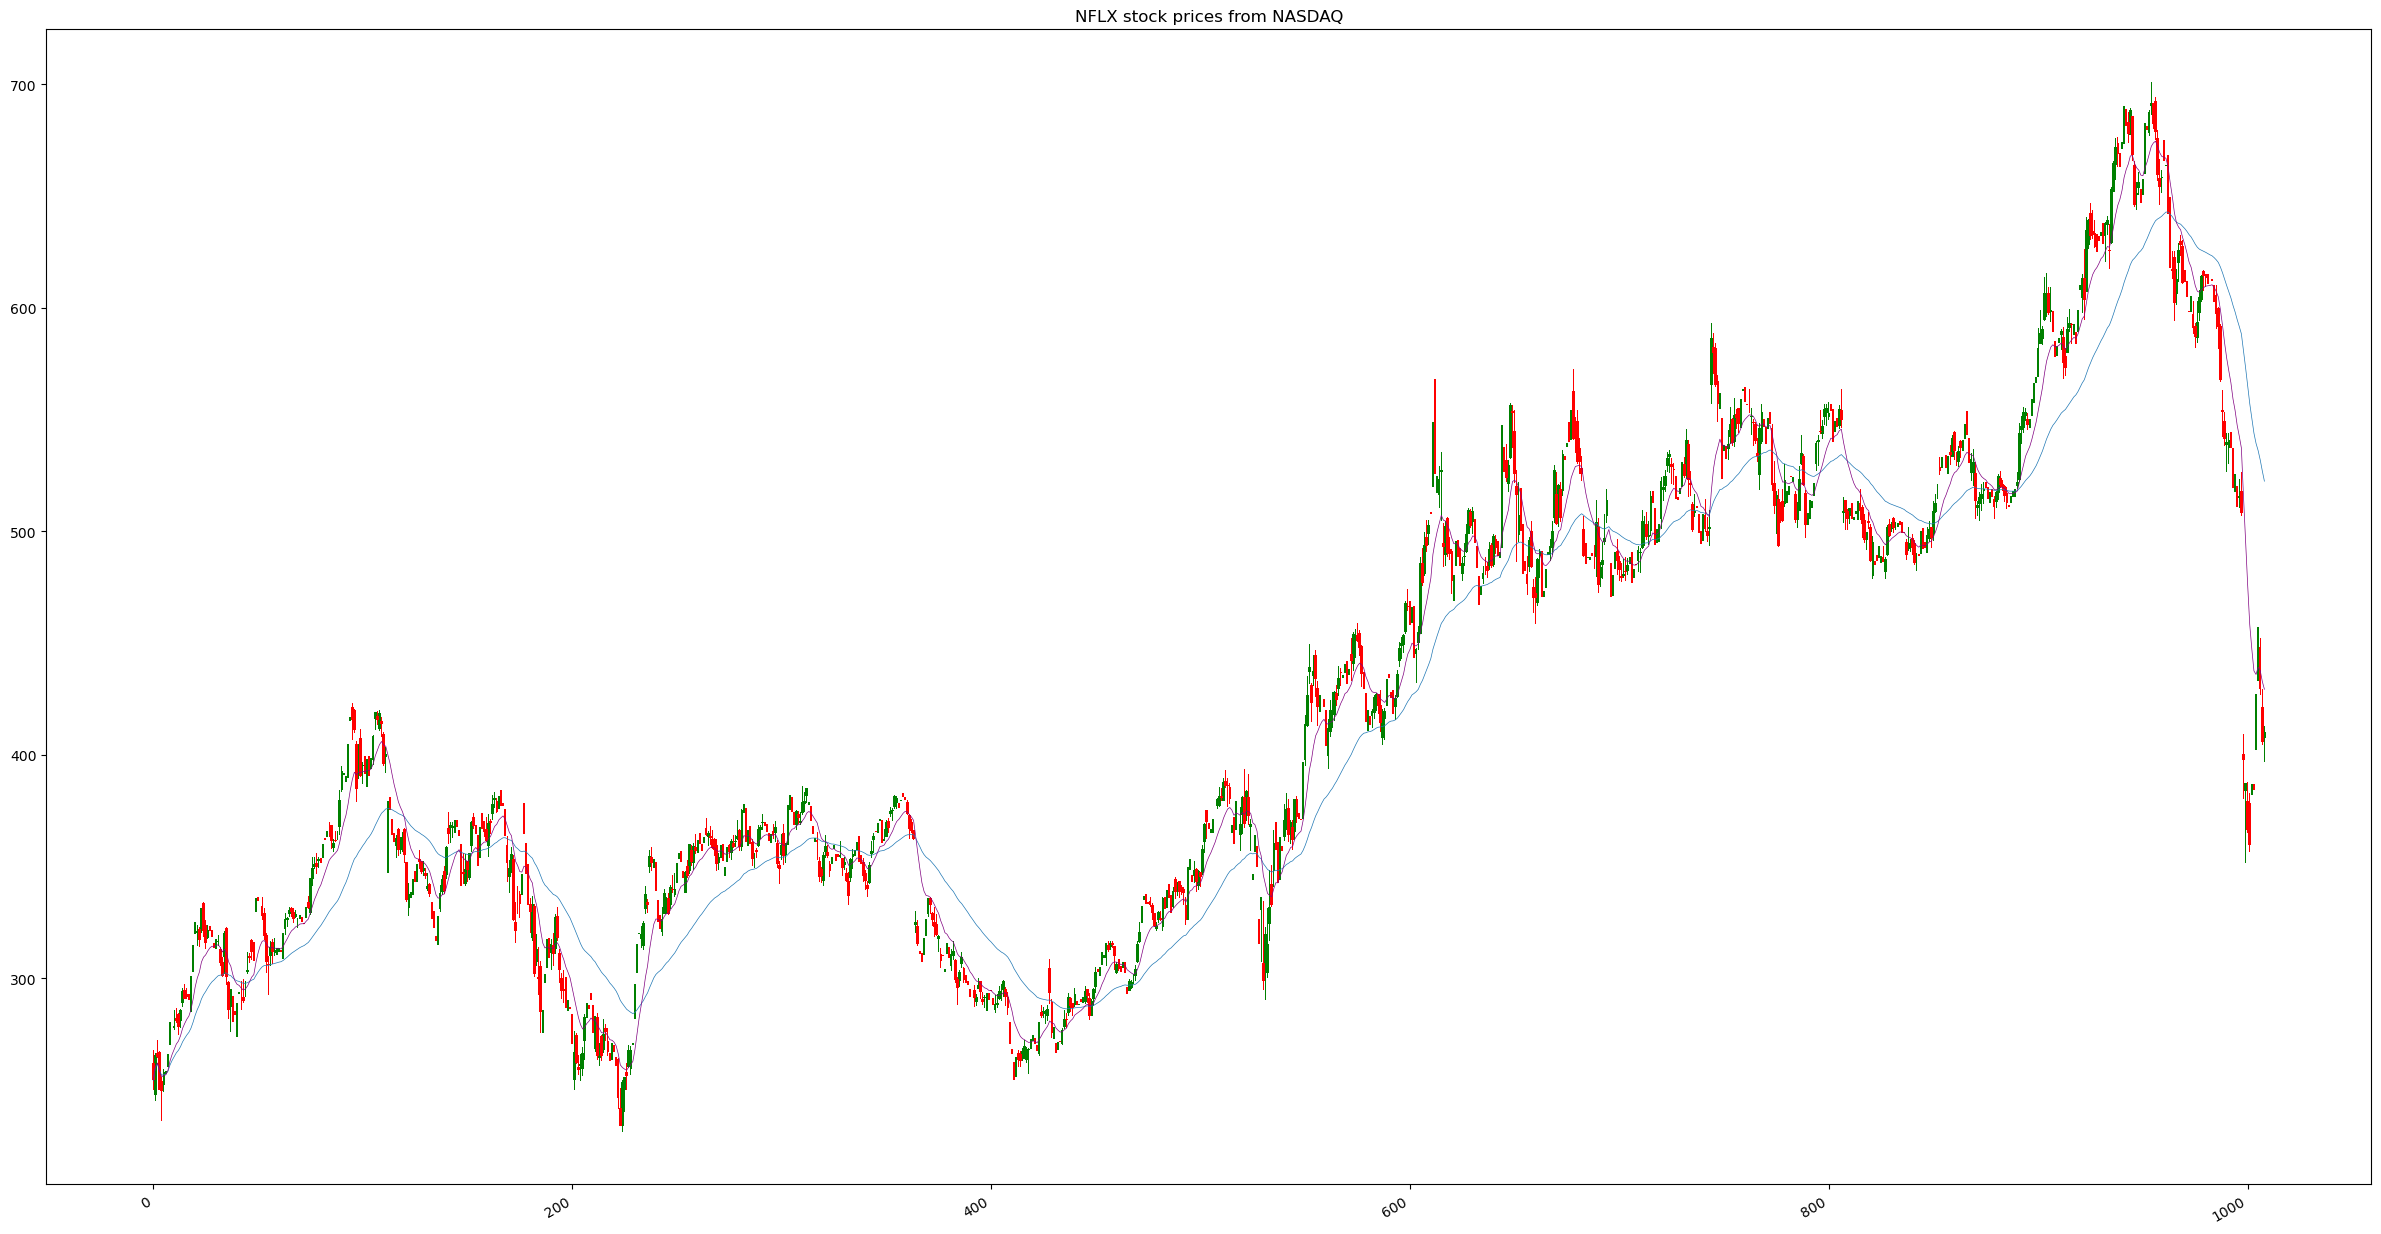

In [20]:
stock_prices = nflx
plt.figure(figsize = (30,15)) 

up = stock_prices[stock_prices.Close >= stock_prices.Open] 
down = stock_prices[stock_prices.Close < stock_prices.Open] 
  
col1 = 'green'
col2 = 'red'
  
width = 1.2
width2 = 0.3

# Plotting up prices of the stock 
plt.bar(up.index, up.Close-up.Open, width, bottom=up.Open, color=col1) 
plt.bar(up.index, up.High-up.Close, width2, bottom=up.Close, color=col1) 
plt.bar(up.index, up.Low-up.Open, width2, bottom=up.Open, color=col1) 
  
# Plotting down prices of the stock 
plt.bar(down.index, down.Close-down.Open, width, bottom=down.Open, color=col2) 
plt.bar(down.index, down.High-down.Open, width2, bottom=down.Open, color=col2) 
plt.bar(down.index, down.Low-down.Close, width2, bottom=down.Close, color=col2) 
  
# rotating the x-axis tick labels at 30degree  
# towards right 
plt.xticks(rotation=30, ha='right') 


nflx['SMA30'] = nflx['Close'].rolling(30).mean()
nflx['SMA8'] = nflx['Close'].rolling(8).mean()
nflx['EMA50'] = nflx['Close'].ewm(span=50).mean()
nflx['EMA12'] = nflx['Close'].ewm(span=12).mean()

plt.plot(stock_prices.EMA50,linewidth=0.5 )
plt.plot(stock_prices.EMA12,color='purple',linewidth=0.5,)

plt.title("NFLX stock prices from NASDAQ")
# displaying candlestick chart of stock data  
# of a week 
plt.show() 

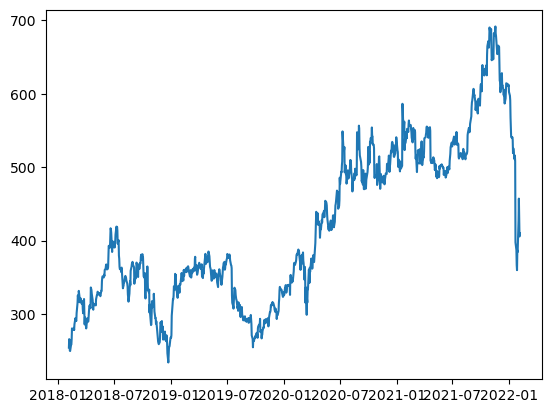

In [22]:
#CLOSING PRICES PLOT

close_prices = nflx['Close']
high_prices = nflx['High']
low_prices = nflx['Low']
dates = nflx['Date']

plt.xticks(rotation=45)
plt.plot(dates, close_prices)
# plt.plot(high_prices)
# plt.plot(low_prices)
plt.show()

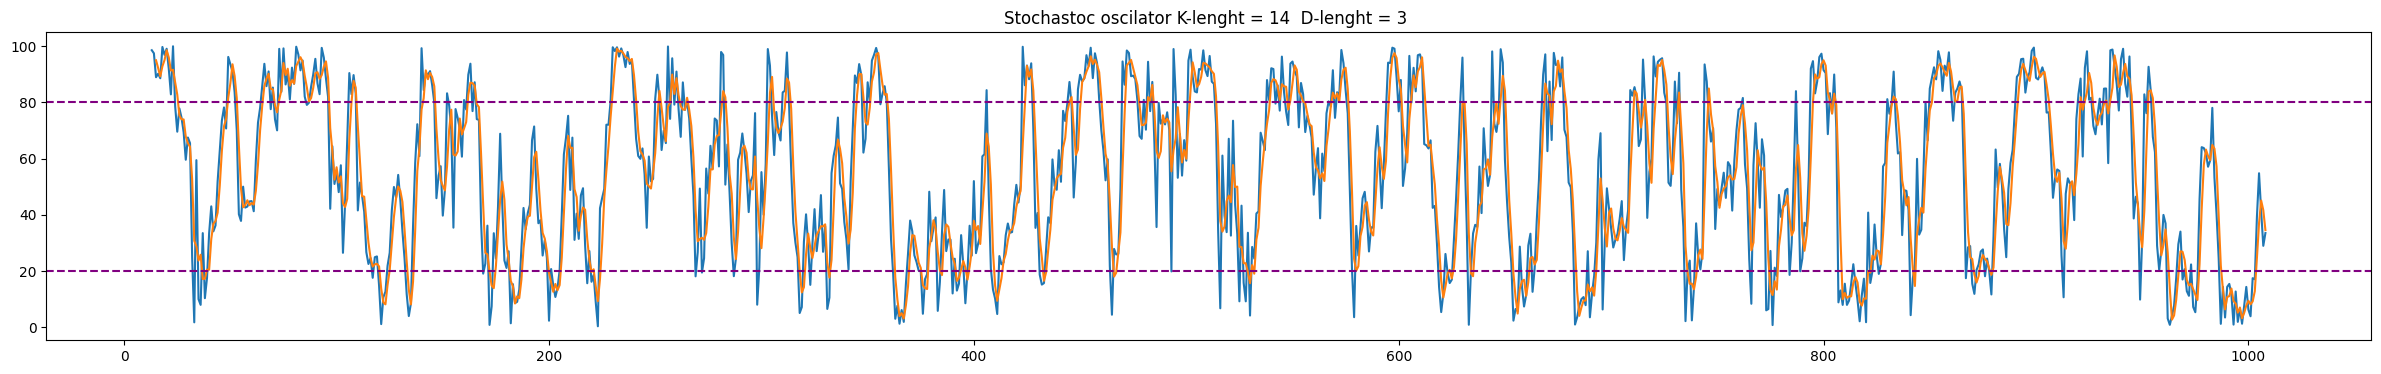

In [144]:
#STOCHASTIC OSCILATOR
plt.figure(figsize = (30,4)) 
k_period = 14
d_period = 3
# Adds a "n_high" column with max value of previous 14 periods
nflx['n_high'] = nflx['High'].rolling(k_period).max()
# Adds an "n_low" column with min value of previous 14 periods
nflx['n_low'] = nflx['Low'].rolling(k_period).min()
# Uses the min/max values to calculate the %k (as a percentage)
nflx['K'] = (nflx['Close'] - nflx['n_low']) * 100 / (nflx['n_high'] - nflx['n_low'])
# Uses the %k to calculates a SMA over the past 3 values of %k
nflx['D'] = nflx['K'].rolling(d_period).mean()

plt.plot(nflx.K)
plt.plot(nflx.D)
plt.axhline(y=20,color='purple', linestyle='--')
plt.axhline(y=80,color='purple', linestyle='--')
plt.title("Stochastoc oscilator K-lenght = 14  D-lenght = 3 ")
plt.show()

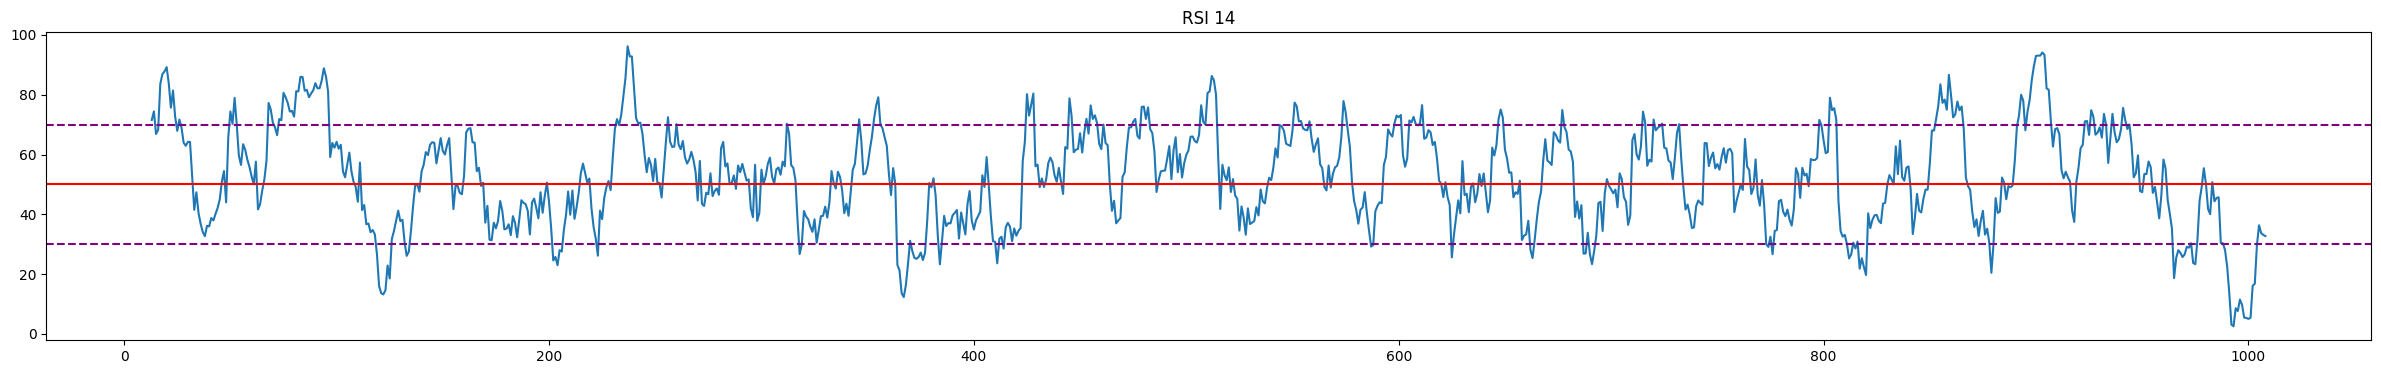

In [145]:
#RSI (relative strength index)

nflx['Price Change'] = nflx['Close'].diff()

# Calculate the positive and negative price changes
nflx['Positive Change'] = nflx['Price Change'].apply(lambda x: x if x > 0 else 0)
nflx['Negative Change'] = nflx['Price Change'].apply(lambda x: -x if x < 0 else 0)

# Set the period for RSI calculation (e.g., 14 days)
period = 14

# Calculate the average gain and average loss over the period
avg_gain = nflx['Positive Change'].rolling(window=period).mean()
avg_loss = nflx['Negative Change'].rolling(window=period).mean()

# Calculate the relative strength (RS)
rs = avg_gain / avg_loss

# Calculate the RSI
rsi = 100 - (100 / (1 + rs))

# Add the RSI values to the DataFrame
nflx['RSI'] = rsi


plt.figure(figsize = (30,4)) 
plt.plot(nflx.RSI)
plt.axhline(y=30,color='purple', linestyle='--')
plt.axhline(y=70,color='purple', linestyle='--')
plt.axhline(y=50,color='red')
plt.title("RSI 14")
plt.show()


Text(0.5, 1.0, 'Volume')

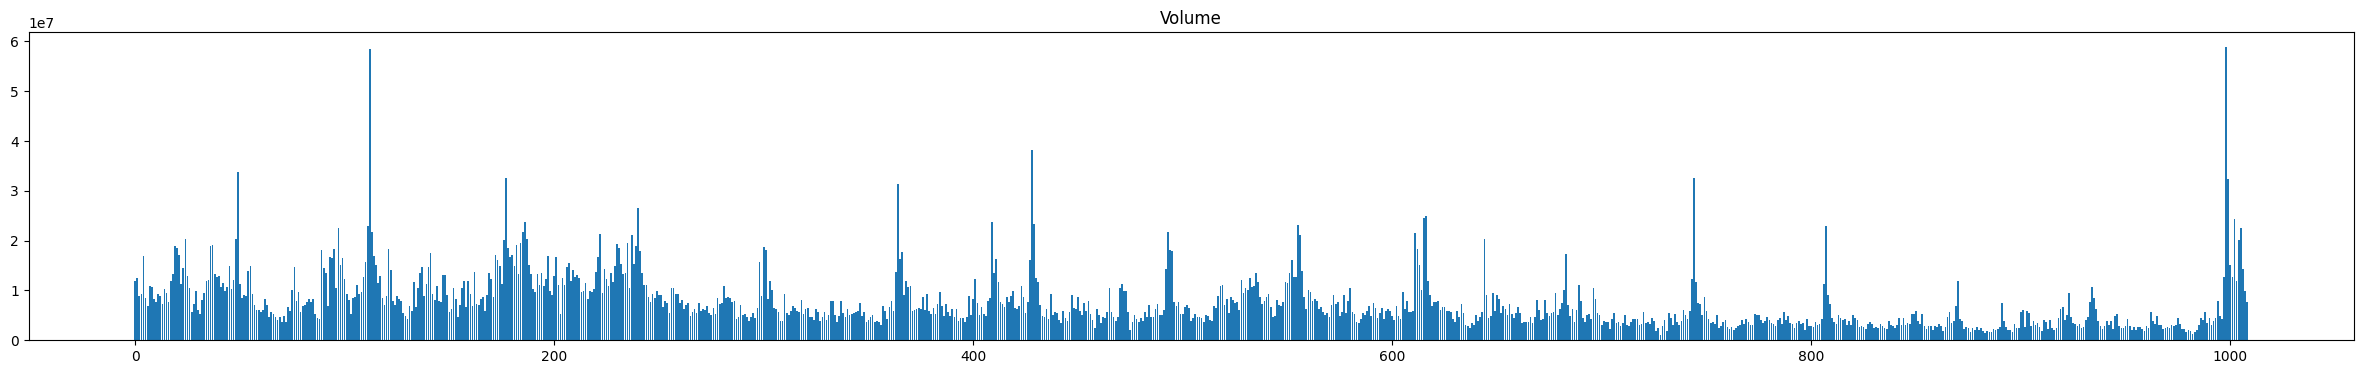

In [146]:
plt.figure(figsize = (30,4))
plt.bar(nflx.index ,nflx.Volume)
plt.title("Volume")
# plt.plot(nflx.Volume)

In [148]:
from pytrends.request import TrendReq
import seaborn
pt = TrendReq(hl="en-US", tz=360)
pt.build_payload(kw_list = ["NFLX"])
frame = pt.interest_over_time()
frame

<bound method TrendReq.interest_over_time of <pytrends.request.TrendReq object at 0x00000286E984F290>>